### Linear Regression to estimate the weight of fish.

Steps
1. Import
2. Univariate Analysis
3. Multivariate Analysis
4. Regression with sklearn
5. Regression with statsmodels
6. Predictions
7. Testing with test data

#### Imports & reading data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_at = 'E:/learning/upgrad/practice/data/'

In [3]:
df = pd.read_csv(data_at + 'Fish.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.shape

(159, 7)

In [7]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
cols = list(df.columns)

In [9]:
cols

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [10]:
cols.remove('Species')
cols.remove('Weight')

In [11]:
cols

['Length1', 'Length2', 'Length3', 'Height', 'Width']

Plotting

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

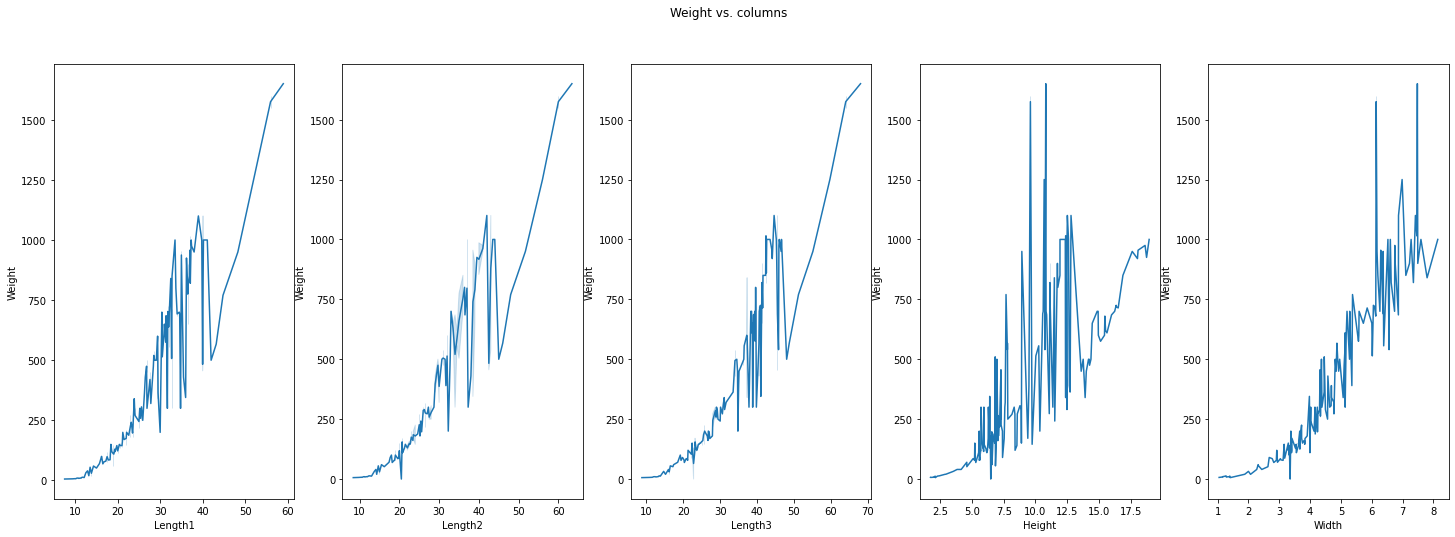

In [13]:
fig, axs = plt.subplots(ncols=5, figsize=(25, 8))
fig.suptitle('Weight vs. columns')
idx = 0
for col in cols:
    sns.lineplot(data=df, x=col, y='Weight', ax=axs[idx])
    idx += 1
plt.show()

There is a visible linear relationship between each of the non-target variables and the target variable

Check for multi-collinearity

Use Seaborn's pairplot.

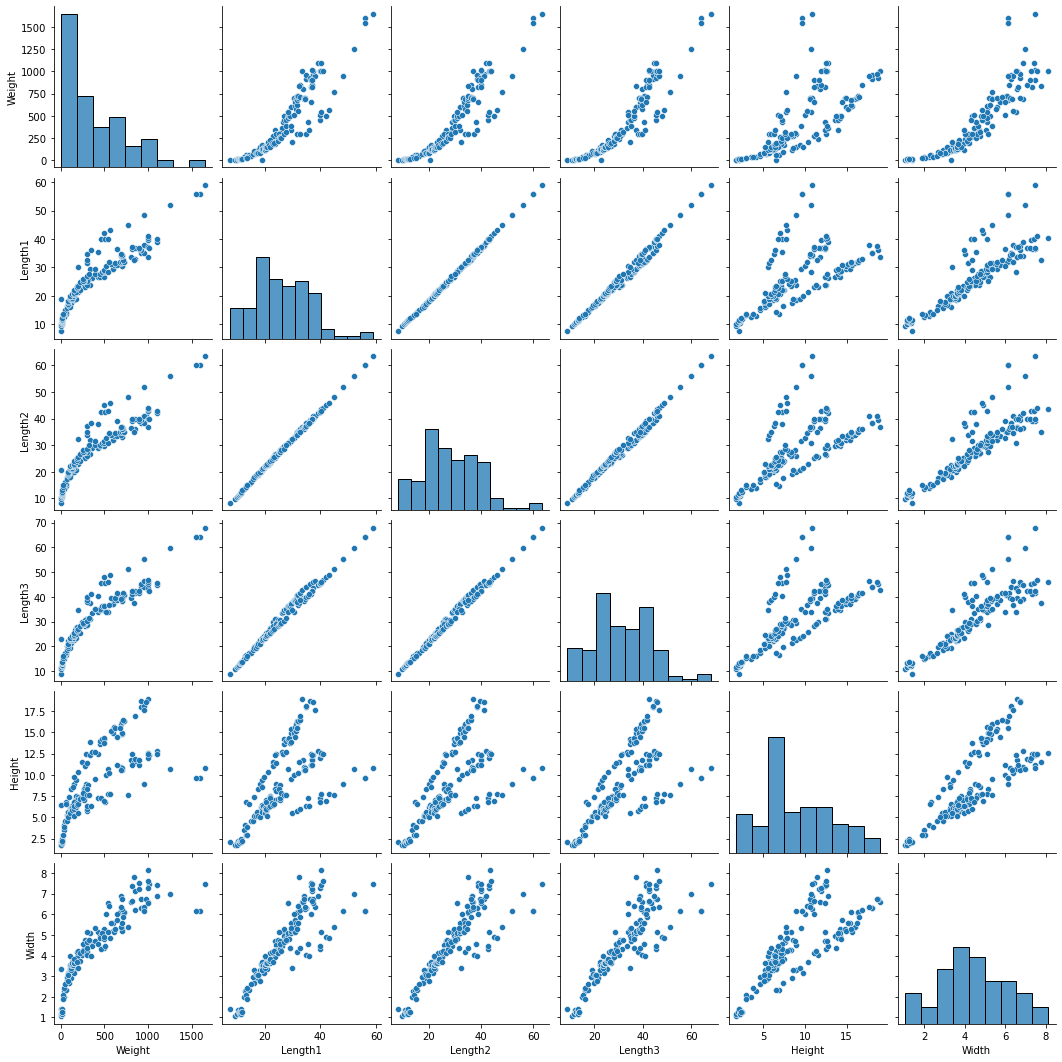

In [14]:
sns.pairplot(data=df)

Get the correlations and plot a Heatmap

In [15]:
corr = df.corr()

<AxesSubplot:>

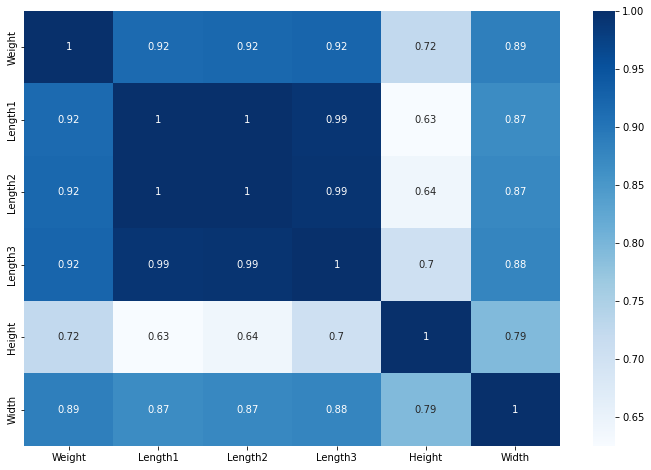

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='Blues', annot=True)

* Length1 and Length2 are basically the same column
* Length3 is highly correlated with Length1 and Length2

In [17]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [18]:
dummies = pd.get_dummies(df.Species, drop_first=True)

In [19]:
dummies.head()

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [20]:
df = pd.concat([df, dummies], axis=1)

In [21]:
df.drop('Species', axis=1, inplace=True)

In [22]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


### Train-test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=47)

In [25]:
df_train.shape

(111, 12)

In [26]:
df_test.shape

(48, 12)

In [27]:
df_train.head()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
46,140.0,21.0,22.5,25.0,6.5500,3.3250,0,0,0,1,0,0
69,200.0,21.2,23.0,25.8,10.3458,3.6636,1,0,0,0,0,0
115,690.0,34.6,37.0,39.3,10.5717,6.3666,0,1,0,0,0,0
64,120.0,17.5,19.0,21.3,8.3922,2.9181,1,0,0,0,0,0
20,575.0,31.3,34.0,39.5,15.1285,5.5695,0,0,0,0,0,0


### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
all_cols = df.columns

In [30]:
all_cols

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Parkki',
       'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [31]:
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])

In [32]:
df_train.head()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
46,-0.808646,-0.629167,-0.656868,-0.640911,-0.643047,-0.746962,-0.297044,-0.750587,-0.379908,3.178050,-0.278693,-0.217186
69,-0.646273,-0.609533,-0.611029,-0.573125,0.232127,-0.547610,3.366502,-0.750587,-0.379908,-0.314658,-0.278693,-0.217186
115,0.679772,0.705933,0.672479,0.570759,0.284211,1.043791,-0.297044,1.332291,-0.379908,-0.314658,-0.278693,-0.217186
64,-0.862770,-0.972759,-0.977745,-0.954420,-0.218302,-0.986526,3.366502,-0.750587,-0.379908,-0.314658,-0.278693,-0.217186
20,0.368557,0.381975,0.397441,0.587705,1.334844,0.574496,-0.297044,-0.750587,-0.379908,-0.314658,-0.278693,-0.217186


### Split into X and y

In [33]:
def split_x_y(df):
    y = df.pop('Weight')
    X = df

    return (X, y)

In [34]:
X_train, y_train = split_x_y(df_train)

In [35]:
y_train.head()

46    -0.808646
69    -0.646273
115    0.679772
64    -0.862770
20     0.368557
Name: Weight, dtype: float64

In [36]:
X_train.head()

,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
46,-0.629167,-0.656868,-0.640911,-0.643047,-0.746962,-0.297044,-0.750587,-0.379908,3.178050,-0.278693,-0.217186
69,-0.609533,-0.611029,-0.573125,0.232127,-0.547610,3.366502,-0.750587,-0.379908,-0.314658,-0.278693,-0.217186
115,0.705933,0.672479,0.570759,0.284211,1.043791,-0.297044,1.332291,-0.379908,-0.314658,-0.278693,-0.217186
64,-0.972759,-0.977745,-0.954420,-0.218302,-0.986526,3.366502,-0.750587,-0.379908,-0.314658,-0.278693,-0.217186
20,0.381975,0.397441,0.587705,1.334844,0.574496,-0.297044,-0.750587,-0.379908,-0.314658,-0.278693,-0.217186


### Drop features using RFE

In [37]:
from sklearn.feature_selection import RFE

In [38]:
from sklearn.linear_model import LinearRegression

#### Using sklearn

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
def fit_rfe(n):
    rfe = RFE(lr, n_features_to_select=n)
    rfe = rfe.fit(X_train, y_train)

    return rfe

In [42]:
rfe = fit_rfe(10)

In [43]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Length1', True, 1),
 ('Length2', True, 1),
 ('Length3', True, 1),
 ('Height', True, 1),
 ('Width', False, 2),
 ('Parkki', True, 1),
 ('Perch', True, 1),
 ('Pike', True, 1),
 ('Roach', True, 1),
 ('Smelt', True, 1),
 ('Whitefish', True, 1)]

In [45]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

Need to drop unnecessary variables using VIF

#### Using Statsmodels

In [46]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [47]:
import statsmodels.api as sm

In [48]:
X_train_sm = sm.add_constant(X_train)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Fit using OLS and check VIF

In [49]:
ols = sm.OLS(y_train, X_train_sm).fit()

In [50]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     153.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           5.01e-57
Time:                        23:28:39   Log-Likelihood:                 3.0857
No. Observations:                 111   AIC:                             17.83
Df Residuals:                      99   BIC:                             50.34
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.024  -2.64e-15      1.000      -0.047       0.047
Length1       -2.2643      1.168     -1.938      0.055      -4.583       0.054
Length2        2.2296      1.676      1.331      0.186      -1.095       5.555
Length3        1.2418      1.197      1.038      0.302      -1.133       3.616
Height         0.2012      0.168      1.195      0.235      -0.133       0.535
Width         -0.0920      0.133     -0.692      0.491      -0.356       0.172
Parkki         0.1502      0.069      2.171      0.032       0.013       0.287
Perch          0.3028      0.193      1.568      0.120      -0.080       0.686
Pike          -0.1251      0.144     -0.870      0.387      -0.410       0.160
Roach          0.1102      0.083      1.334      0.185      -0.054       0.274
Smelt          0.3874      0.101      3.819      0.000       0.186       0.589
Whitefish      0.1023      0.065      1.565      0.121      -0.027       0.232
==============================================================================
Omnibus:                       46.494   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.347
Skew:                           1.455   Prob(JB):                     3.05e-34
Kurtosis:                       7.991   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
calculate_vif(X_train_sm)

,Features,VIF
2,Length2,5019.61
3,Length3,2559.65
1,Length1,2440.39
7,Perch,66.65
4,Height,50.68
8,Pike,36.95
5,Width,31.64
10,Smelt,18.40
9,Roach,12.20
6,Parkki,8.55


Drop "width", since it has a high p-value. Then re-check OLS summary and VIFs.

In [52]:
X_train_new = X_train_sm.drop('Width', axis=1)

In [53]:
ols = sm.OLS(y_train, X_train_new).fit()

In [54]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           4.75e-58
Time:                        23:28:40   Log-Likelihood:                 2.8181
No. Observations:                 111   AIC:                             16.36
Df Residuals:                     100   BIC:                             46.17
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.024  -2.65e-15      1.000      -0.047       0.047
Length1       -2.3453      1.160     -2.023      0.046      -4.646      -0.045
Length2        2.4011      1.653      1.453      0.149      -0.878       5.681
Length3        1.0934      1.174      0.931      0.354      -1.236       3.423
Height         0.1380      0.141      0.978      0.330      -0.142       0.418
Parkki         0.1344      0.065      2.064      0.042       0.005       0.264
Perch          0.2383      0.169      1.413      0.161      -0.096       0.573
Pike          -0.1449      0.141     -1.031      0.305      -0.424       0.134
Roach          0.0818      0.071      1.144      0.255      -0.060       0.224
Smelt          0.3611      0.094      3.851      0.000       0.175       0.547
Whitefish      0.0786      0.056      1.415      0.160      -0.032       0.189
==============================================================================
Omnibus:                       48.162   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.129
Skew:                           1.510   Prob(JB):                     6.23e-36
Kurtosis:                       8.093   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
calculate_vif(X_train_new)

,Features,VIF
2,Length2,4909.70
3,Length3,2477.33
1,Length1,2415.88
6,Perch,51.10
4,Height,35.74
7,Pike,35.48
9,Smelt,15.80
8,Roach,9.19
5,Parkki,7.62
10,Whitefish,5.55


"Length3" has high p-value and high VIF. Drop row.

In [56]:
X_train_new = X_train_new.drop('Length3', axis=1)

In [57]:
ols = sm.OLS(y_train, X_train_new).fit()

In [58]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     188.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           5.15e-59
Time:                        23:28:41   Log-Likelihood:                 2.3389
No. Observations:                 111   AIC:                             15.32
Df Residuals:                     101   BIC:                             42.42
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.024  -2.65e-15      1.000      -0.047       0.047
Length1       -2.3638      1.159     -2.040      0.044      -4.662      -0.065
Length2        3.4701      1.189      2.920      0.004       1.112       5.828
Height         0.1615      0.139      1.164      0.247      -0.114       0.437
Parkki         0.0859      0.039      2.201      0.030       0.008       0.163
Perch          0.1095      0.096      1.137      0.258      -0.082       0.301
Pike          -0.2098      0.122     -1.721      0.088      -0.452       0.032
Roach          0.0427      0.058      0.739      0.462      -0.072       0.157
Smelt          0.3015      0.069      4.401      0.000       0.166       0.437
Whitefish      0.0427      0.040      1.069      0.288      -0.037       0.122
==============================================================================
Omnibus:                       46.388   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.459
Skew:                           1.473   Prob(JB):                     9.54e-33
Kurtosis:                       7.817   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
calculate_vif(X_train_new)

,Features,VIF
2,Length2,2541.74
1,Length1,2415.17
3,Height,34.59
6,Pike,26.75
5,Perch,16.69
8,Smelt,8.44
7,Roach,6.02
9,Whitefish,2.87
4,Parkki,2.74
0,const,1.00


"Roach" has a high p-value. Drop it.

In [60]:
X_train_new = X_train_new.drop('Roach', axis=1)

In [61]:
ols = sm.OLS(y_train, X_train_new).fit()

In [62]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     213.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           4.47e-60
Time:                        23:28:41   Log-Likelihood:                 2.0400
No. Observations:                 111   AIC:                             13.92
Df Residuals:                     102   BIC:                             38.31
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.024  -2.65e-15      1.000      -0.047       0.047
Length1       -2.1658      1.125     -1.926      0.057      -4.396       0.065
Length2        3.3257      1.170      2.843      0.005       1.006       5.646
Height         0.0798      0.083      0.956      0.341      -0.086       0.245
Parkki         0.0656      0.028      2.373      0.020       0.011       0.120
Perch          0.0464      0.044      1.045      0.299      -0.042       0.134
Pike          -0.2847      0.068     -4.215      0.000      -0.419      -0.151
Smelt          0.2581      0.035      7.352      0.000       0.188       0.328
Whitefish      0.0213      0.027      0.776      0.439      -0.033       0.076
==============================================================================
Omnibus:                       41.888   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.593
Skew:                           1.339   Prob(JB):                     8.81e-28
Kurtosis:                       7.446   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
calculate_vif(X_train_new)

,Features,VIF
2,Length2,2472.98
1,Length1,2285.88
3,Height,12.60
6,Pike,8.24
5,Perch,3.56
7,Smelt,2.23
4,Parkki,1.38
8,Whitefish,1.36
0,const,1.00


"Whitefish" has a high p-value. Drop it.

In [64]:
X_train_new = X_train_new.drop('Whitefish', axis=1)

In [65]:
ols = sm.OLS(y_train, X_train_new).fit()

In [66]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     244.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           3.71e-61
Time:                        23:28:42   Log-Likelihood:                 1.7131
No. Observations:                 111   AIC:                             12.57
Df Residuals:                     103   BIC:                             34.25
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.023  -2.66e-15      1.000      -0.047       0.047
Length1       -2.3439      1.099     -2.133      0.035      -4.523      -0.165
Length2        3.5305      1.137      3.104      0.002       1.275       5.786
Height         0.0512      0.075      0.685      0.495      -0.097       0.200
Parkki         0.0633      0.027      2.309      0.023       0.009       0.118
Perch          0.0298      0.039      0.767      0.445      -0.047       0.107
Pike          -0.3089      0.060     -5.166      0.000      -0.428      -0.190
Smelt          0.2519      0.034      7.383      0.000       0.184       0.320
==============================================================================
Omnibus:                       41.986   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.376
Skew:                           1.341   Prob(JB):                     5.95e-28
Kurtosis:                       7.463   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
calculate_vif(X_train_new)

,Features,VIF
2,Length2,2347.18
1,Length1,2190.76
3,Height,10.15
6,Pike,6.49
5,Perch,2.73
7,Smelt,2.11
4,Parkki,1.36
0,const,1.00


"Height" has a high p-value. Drop it.

In [68]:
X_train_new = X_train_new.drop('Height', axis=1)

In [69]:
ols = sm.OLS(y_train, X_train_new).fit()

In [70]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     286.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           2.65e-62
Time:                        23:28:42   Log-Likelihood:                 1.4608
No. Observations:                 111   AIC:                             11.08
Df Residuals:                     104   BIC:                             30.05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.023  -2.67e-15      1.000      -0.046       0.046
Length1       -2.7381      0.934     -2.932      0.004      -4.590      -0.886
Length2        3.9716      0.935      4.246      0.000       2.117       5.826
Parkki         0.0657      0.027      2.422      0.017       0.012       0.120
Perch          0.0114      0.028      0.407      0.685      -0.044       0.067
Pike          -0.3430      0.033    -10.393      0.000      -0.408      -0.278
Smelt          0.2474      0.033      7.407      0.000       0.181       0.314
==============================================================================
Omnibus:                       41.851   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.054
Skew:                           1.332   Prob(JB):                     4.24e-28
Kurtosis:                       7.490   Cond. No.                         93.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
calculate_vif(X_train_new)

,Features,VIF
2,Length2,1595.21
1,Length1,1589.94
6,Smelt,2.03
5,Pike,1.99
4,Perch,1.44
3,Parkki,1.34
0,const,1.00


"Perch" has a high p-value. Drop it.

In [72]:
X_train_new = X_train_new.drop('Perch', axis=1)

In [73]:
ols = sm.OLS(y_train, X_train_new).fit()

In [74]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     346.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.46e-63
Time:                        23:28:43   Log-Likelihood:                 1.3723
No. Observations:                 111   AIC:                             9.255
Df Residuals:                     105   BIC:                             25.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.023  -2.68e-15      1.000      -0.046       0.046
Length1       -2.6310      0.892     -2.948      0.004      -4.400      -0.862
Length2        3.8619      0.892      4.329      0.000       2.093       5.631
Parkki         0.0615      0.025      2.461      0.016       0.012       0.111
Pike          -0.3472      0.031    -11.092      0.000      -0.409      -0.285
Smelt          0.2418      0.030      7.993      0.000       0.182       0.302
==============================================================================
Omnibus:                       43.054   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.821
Skew:                           1.361   Prob(JB):                     8.73e-30
Kurtosis:                       7.640   Cond. No.                         89.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
calculate_vif(X_train_new)

,Features,VIF
1,Length1,1463.72
2,Length2,1463.00
4,Pike,1.80
5,Smelt,1.68
3,Parkki,1.15
0,const,1.00


"Length1" has a high VIF. Drop it.

In [76]:
X_train_new = X_train_new.drop('Length1', axis=1)

In [77]:
ols = sm.OLS(y_train, X_train_new).fit()

In [78]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     402.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           4.42e-63
Time:                        23:28:44   Log-Likelihood:                -3.0423
No. Observations:                 111   AIC:                             16.08
Df Residuals:                     106   BIC:                             29.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.024  -2.59e-15      1.000      -0.048       0.048
Length2        1.2335      0.035     35.121      0.000       1.164       1.303
Parkki         0.0532      0.026      2.069      0.041       0.002       0.104
Pike          -0.3827      0.030    -12.792      0.000      -0.442      -0.323
Smelt          0.2054      0.029      7.181      0.000       0.149       0.262
==============================================================================
Omnibus:                       35.687   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.363
Skew:                           1.185   Prob(JB):                     1.45e-20
Kurtosis:                       6.761   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
calculate_vif(X_train_new)

,Features,VIF
1,Length2,2.11
3,Pike,1.53
4,Smelt,1.40
2,Parkki,1.13
0,const,1.00


p-values and VIFs are acceptable now.

### Check Error terms distribution

In [80]:
y_train_pred = ols.predict(X_train_new)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


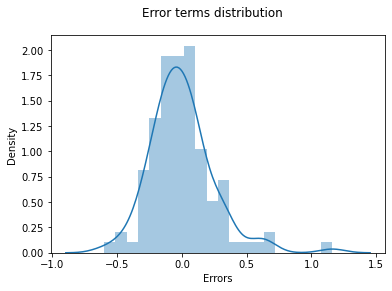

In [81]:
# Plotting a histogram of error terms to check the error term distribution
# The distribution should be normal.
fig = plt.figure()
sns.distplot(y_train - y_train_pred, bins=20)
fig.suptitle('Error terms distribution')
plt.xlabel('Errors')
plt.show()

Distribution is normal. So, the assumptions of Linear Regression hold.

### Check training R-squared

In [82]:
from sklearn.metrics import r2_score

In [83]:
r_squared = r2_score(y_true=y_train, y_pred=y_train_pred)

In [84]:
r_squared

0.9381511136482703

R-squared is approx. 0.94

### Making predictions

In [85]:
df_test.head()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
78,78.0,16.8,18.7,19.4,5.1992,3.1234,0,1,0,0,0,0
99,180.0,23.0,25.0,26.5,6.4395,3.6835,0,1,0,0,0,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0
120,900.0,37.0,40.0,42.5,11.7300,7.2250,0,1,0,0,0,0


Scale the test data

In [86]:
all_cols

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Parkki',
       'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [87]:
df_test[all_cols] = scaler.transform(df_test[all_cols])

In [88]:
df_test.head()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
1,-0.402714,-0.334659,-0.308488,-0.115572,0.724196,-0.169630,-0.297044,-0.750587,-0.379908,-0.314658,-0.278693,-0.217186
78,-0.976431,-1.041477,-1.005249,-1.115411,-0.954492,-0.865654,-0.297044,1.332291,-0.379908,-0.314658,-0.278693,-0.217186
99,-0.700397,-0.432829,-0.427671,-0.513813,-0.668524,-0.535894,-0.297044,1.332291,-0.379908,-0.314658,-0.278693,-0.217186
157,-1.134203,-1.394886,-1.408637,-1.471286,-1.490876,-1.487496,-0.297044,-0.750587,-0.379908,-0.314658,3.588175,-0.217186
120,1.248076,0.941539,0.947516,0.841901,0.551273,1.549177,-0.297044,1.332291,-0.379908,-0.314658,-0.278693,-0.217186


In [89]:
y_test = df_test.pop('Weight')
X_test = df_test

In [90]:
y_test.head()

1     -0.402714
78    -0.976431
99    -0.700397
157   -1.134203
120    1.248076
Name: Weight, dtype: float64

In [91]:
X_test.head()

,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
1,-0.334659,-0.308488,-0.115572,0.724196,-0.169630,-0.297044,-0.750587,-0.379908,-0.314658,-0.278693,-0.217186
78,-1.041477,-1.005249,-1.115411,-0.954492,-0.865654,-0.297044,1.332291,-0.379908,-0.314658,-0.278693,-0.217186
99,-0.432829,-0.427671,-0.513813,-0.668524,-0.535894,-0.297044,1.332291,-0.379908,-0.314658,-0.278693,-0.217186
157,-1.394886,-1.408637,-1.471286,-1.490876,-1.487496,-0.297044,-0.750587,-0.379908,-0.314658,3.588175,-0.217186
120,0.941539,0.947516,0.841901,0.551273,1.549177,-0.297044,1.332291,-0.379908,-0.314658,-0.278693,-0.217186


Only keep the columns from the OLS model.

In [92]:
X_train_new.columns

Index(['const', 'Length2', 'Parkki', 'Pike', 'Smelt'], dtype='object')

In [93]:
X_test_new = sm.add_constant(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [94]:
X_test_new = X_test_new[X_train_new.columns]

In [95]:
X_test_new.head()

,const,Length2,Parkki,Pike,Smelt
1,1.0,-0.308488,-0.297044,-0.379908,-0.278693
78,1.0,-1.005249,-0.297044,-0.379908,-0.278693
99,1.0,-0.427671,-0.297044,-0.379908,-0.278693
157,1.0,-1.408637,-0.297044,-0.379908,3.588175
120,1.0,0.947516,-0.297044,-0.379908,-0.278693


In [96]:
y_pred = ols.predict(X_test_new)

Check test data R-squared

In [97]:
test_r_squared = r2_score(y_true=y_test, y_pred=y_pred)

In [98]:
test_r_squared

0.8989966047786205

R squared on test data is also good.

Plot predicted and actual y values

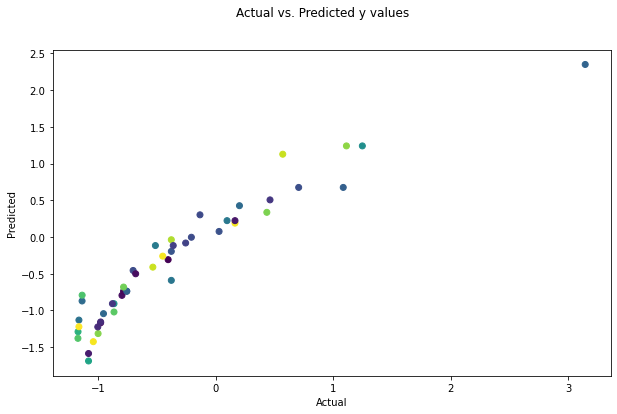

In [99]:
fig = plt.figure(figsize=(10, 6))
colors = np.random.rand(y_test.size)
plt.scatter(y_test, y_pred, c=colors)
fig.suptitle('Actual vs. Predicted y values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [100]:
type(y_test)

pandas.core.series.Series

In [105]:
type(y_pred)

pandas.core.series.Series

In [101]:
fin_df = pd.concat([y_pred, y_test], axis=1)

In [107]:
fin_df.columns = ['Predicted', 'Actual']

In [110]:
fin_df.reset_index(inplace=True)

In [111]:
fin_df.head()

,index,Predicted,Actual
0,1,-0.308209,-0.402714
1,78,-1.167668,-0.976431
2,99,-0.455222,-0.700397
3,157,-0.870865,-1.134203
4,120,1.241077,1.248076


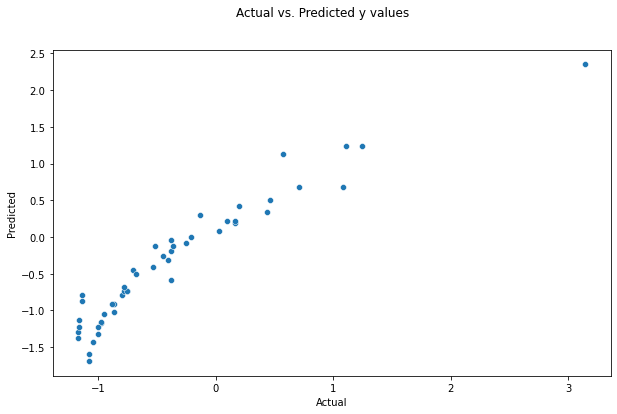

In [115]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Actual vs. Predicted y values')
sns.scatterplot(data=fin_df, y='Predicted', x='Actual')
plt.show()

In [116]:
import jovian

<IPython.core.display.Javascript object>

In [123]:
jovian.commit(project='Linear Regression', files=['linear_steps.md', 'fish_market.ipynb'], filename='fish_market.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kavurisrikanth/linear-regression" on https://jovian.ai/
[jovian] Uploading additional files...


[jovian] Error: File upload failed: (HTTP 400) Invalid filename or extension (linear_steps.md)


[jovian] Committed successfully! https://jovian.ai/kavurisrikanth/linear-regression


'https://jovian.ai/kavurisrikanth/linear-regression'